# pytorch funcs

## tensor.expand()和tensor.expand_as()
refs:
[pytorch中tensor.expand()和tensor.expand_as()函数详解](https://www.jb51.net/article/177365.htm)

In [2]:
import torch

In [3]:
a=torch.tensor([[2],[3],[4]])
print(a.size())
a.expand(3,2)
a

torch.Size([3, 1])


tensor([[2],
        [3],
        [4]])

可以看出expand()函数括号里面为变形后的size大小，而且原来的tensor和tensor.expand()是不共享内存的。

函数返回张量在某一个维度扩展之后的张量，就是将张量广播到新形状。函数对返回的张量不会分配新内存，即在原始张量上返回只读视图，返回的张量内存是不连续的。类似于numpy中的broadcast_to函数的作用。如果希望张量内存连续，可以调用contiguous函数。

In [5]:
x = torch.tensor([1, 2, 3, 4])
xnew = x.expand(2, 4)
print(xnew)

tensor([[1, 2, 3, 4],
        [1, 2, 3, 4]])


In [4]:
b=torch.tensor([[2,2],[3,3],[5,5]])
print(b.size())
torch.Size([3, 2])
a.expand_as(b)
a

torch.Size([3, 2])


tensor([[2],
        [3],
        [4]])

可以看出，b和a.expand_as(b)的size是一样大的。且是不共享内存的。

## torch.repeat

torch.repeat用法类似np.tile，就是将原矩阵横向、纵向地复制。与torch.expand不同的是torch.repeat返回的张量在内存中是连续的。

### 将张量横向的复制

In [6]:
x = torch.tensor([1, 2, 3])
xnew = x.repeat(1,3)
print(xnew)

tensor([[1, 2, 3, 1, 2, 3, 1, 2, 3]])


### 将张量纵向的复制

In [7]:
x = torch.tensor([1, 2, 3])
xnew = x.repeat(3,1)
print(xnew)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])


## torch.topk()
refs:
[torch.topk()](https://blog.csdn.net/u014264373/article/details/86525621)

沿给定dim维度返回输入张量input中 k 个最大值。
如果不指定dim，则默认为input的最后一维。
如果为largest为 False ，则返回最小的 k 个值。

返回一个元组 (values,indices)，其中indices是原始输入张量input中测元素下标。
如果设定布尔值sorted 为_True_，将会确保返回的 k 个值被排序。

参数:
+ input (Tensor) – 输入张量
+ k (int) – “top-k”中的k
+ dim (int, optional) – 排序的维
+ largest (bool, optional) – 布尔值，控制返回最大或最小值
+ sorted (bool, optional) – 布尔值，控制返回值是否排序
+ out (tuple, optional) – 可选输出张量 (Tensor, LongTensor) output buffer

In [15]:
preds = torch.tensor([
    [-5.4, -.22],
    [-4.25, -0.47],
    [-0.10, -5.15],
    [-0.17, -4.33]
])
print(f'preds: {preds.shape}  {preds}')
maxk = max((1,))
print(f'maxk:  {maxk}')
vals, inds = preds.topk(maxk, 1, True, True)
print(f'vals: {vals.shape}  {vals}')
print(f'inds: {inds.shape}  {inds}')

preds: torch.Size([4, 2])  tensor([[-5.4000, -0.2200],
        [-4.2500, -0.4700],
        [-0.1000, -5.1500],
        [-0.1700, -4.3300]])
maxk:  1
vals: torch.Size([4, 1])  tensor([[-0.2200],
        [-0.4700],
        [-0.1000],
        [-0.1700]])
inds: torch.Size([4, 1])  tensor([[1],
        [1],
        [0],
        [0]])


topk参数中，maxk取得是top1准确率，dim=1是按行取值， largest=1是取最大值

vals是top1的值，inds是最大值的索引（size=4*1），一般会进行转置处理同真实值对比

In [18]:
tensor_0 = torch.arange(3, 12).view(3, 3)
print(tensor_0)
index = torch.tensor([[2, 1, 0]])
tensor_1 = tensor_0.gather(0, index)
print(tensor_1)

tensor([[ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])
tensor([[9, 7, 5]])


## torch.gather()
refs: 

[理解pytorch几个高级选择函数（如gather）](https://www.cnblogs.com/liangjianli/p/13754817.html)


定义：从原tensor中获取指定dim和指定index的数据

看到这个核心定义，我们很容易想到gather()的基本想法其实就类似从完整数据中按索引取值般简单，比如下面从列表中按索引取值

用途：方便从批量tensor中获取指定索引下的数据，该索引是高度自定义化的，可乱序的

### 输入行向量index，并替换行索引(dim=0)
refs:

[图解PyTorch中的torch.gather函数](https://zhuanlan.zhihu.com/p/352877584)

In [24]:
index = torch.tensor([[2, 1, 0]])
tensor_1 = tensor_0.gather(1, index)
print(tensor_1)

tensor([[5, 4, 3]])


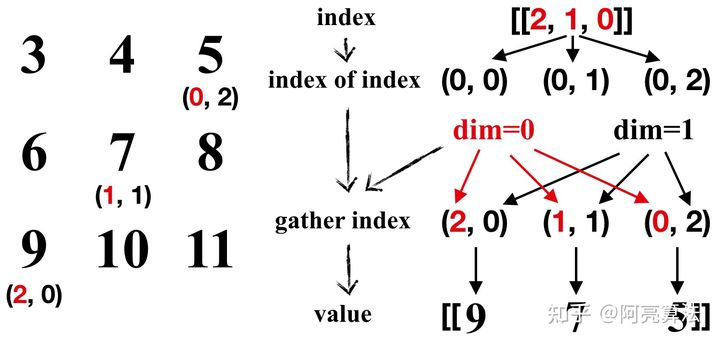

### 输入行向量index，并替换列索引(dim=1)

In [25]:
index = torch.tensor([[2, 1, 0]])
tensor_1 = tensor_0.gather(1, index)
print(tensor_1)

tensor([[5, 4, 3]])


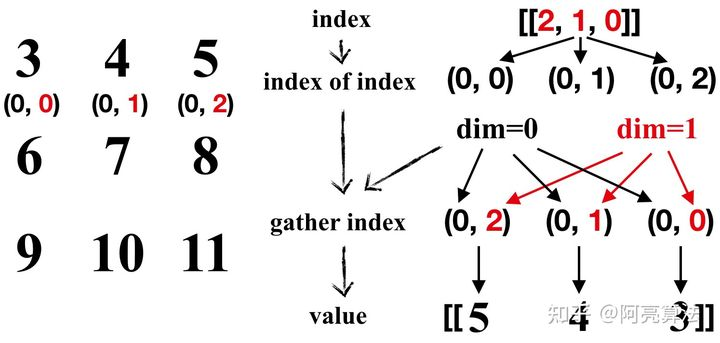

### 输入列向量index，并替换列索引(dim=1)

In [26]:
index = torch.tensor([[2, 1, 0]]).t()
tensor_1 = tensor_0.gather(1, index)
print(tensor_1)

tensor([[5],
        [7],
        [9]])


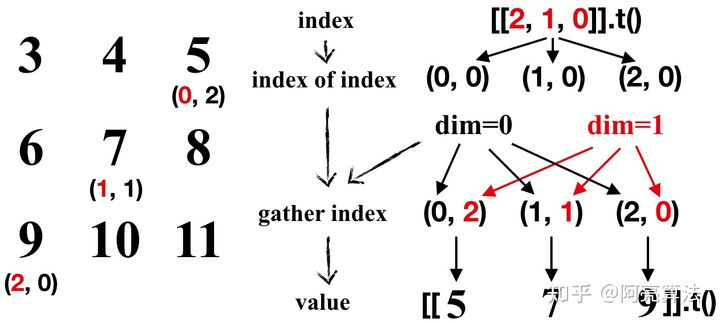

### 输入二维矩阵index，并替换列索引(dim=1)

In [27]:
index = torch.tensor([[0, 2], 
                      [1, 2]])
tensor_1 = tensor_0.gather(1, index)
print(tensor_1)

tensor([[3, 5],
        [7, 8]])


### 总结
从以上典型案例，我们可以归纳出torch.gather()的使用要点

输入index的shape等于输出value的shape
输入index的索引值仅替换该index中对应dim的index值
最终输出为替换index后在原tensor中的值


## Tensor.permute()

refs:

[Pytorch之permute函数](https://zhuanlan.zhihu.com/p/76583143)

将tensor的维度换位。

In [28]:
x = torch.randn(2, 3, 5) 
print(x.size()) 
print(x.permute(2, 0, 1).size() )

torch.Size([2, 3, 5])
torch.Size([5, 2, 3])


permute函数功能还是比较简单的，下面主要介绍几个细节点：
#### transpose与permute的异同
Tensor.permute(a,b,c,d, ...)：permute函数可以对任意高维矩阵进行转置，但没有 torch.permute() 这个调用方式， 只能 Tensor.permute()：

In [29]:
torch.randn(2,3,4,5).permute(3,2,0,1).shape

torch.Size([5, 4, 2, 3])

torch.transpose(Tensor, a,b)：transpose只能操作2D矩阵的转置，有两种调用方式；

另：连续使用transpose也可实现permute的效果：

In [32]:
print(torch.randn(2,3,4,5).transpose(3,0).transpose(2,1).transpose(3,2).shape)
print(torch.randn(2,3,4,5).transpose(1,0).transpose(2,1).transpose(3,1).shape)

torch.Size([5, 4, 2, 3])
torch.Size([3, 5, 2, 4])


从以上操作中可知，permute相当于可以同时操作于tensor的若干维度，transpose只能同时作用于tensor的两个维度；
#### permute函数与contiguous、view函数之关联
contiguous：view只能作用在contiguous的variable上，如果在view之前调用了transpose、permute等，就需要调用contiguous()来返回一个contiguous copy；

一种可能的解释是：有些tensor并不是占用一整块内存，而是由不同的数据块组成，而tensor的view()操作依赖于内存是整块的，这时只需要执行contiguous()这个函数，把tensor变成在内存中连续分布的形式；

判断ternsor是否为contiguous，可以调用torch.Tensor.is_contiguous()函数:

In [33]:
x = torch.ones(10, 10) 
x.is_contiguous()                                 # True 
x.transpose(0, 1).is_contiguous()                 # False
x.transpose(0, 1).contiguous().is_contiguous()    # True

True

另：在pytorch的最新版本0.4版本中，增加了torch.reshape()，与 numpy.reshape() 的功能类似，大致相当于 tensor.contiguous().view()，这样就省去了对tensor做view()变换前，调用contiguous()的麻烦；

## torch.Tensor.contiguous() torch.Tensor.is_contiguous()
refs:

[Pytorch之contiguous函数](https://zhuanlan.zhihu.com/p/64376950)

Pytorch之contiguous函数
torch.Tensor.contiguous (Python method, in torch.Tensor)
返回一个内存连续的有相同数据的tensor，如果原tensor内存连续，则返回原tensor；

torch.Tensor.is_contiguous (Python method, in torch.Tensor)

contiguous一般与transpose，permute，view搭配使用：使用transpose或permute进行维度变换后，调用contiguous，然后方可使用view对维度进行变形（如：tensor_var.contiguous().view() ），示例如下：

In [35]:
x = torch.Tensor(2,3)
y = x.permute(1,0)         # permute：二维tensor的维度变换，此处功能相当于转置transpose
y.view(-1)                 # 报错，view使用前需调用contiguous()函数
y = x.permute(1,0).contiguous()
y.view(-1)                 # OK

RuntimeError: view size is not compatible with input tensor's size and stride (at least one dimension spans across two contiguous subspaces). Use .reshape(...) instead.

具体原因有两种说法：

1 transpose、permute等维度变换操作后，tensor在内存中不再是连续存储的，而view操作要求tensor的内存连续存储，所以需要contiguous来返回一个contiguous copy；

2 维度变换后的变量是之前变量的浅拷贝，指向同一区域，即view操作会连带原来的变量一同变形，这是不合法的，所以也会报错；---- 这个解释有部分道理，也即contiguous返回了tensor的深拷贝contiguous copy数据；

为了证明这一点，我们来看下面的代码：

In [36]:
x = torch.randn(3, 2)
y = x.transpose(x, 0, 1)
x[0, 0] = 233
print(y[0, 0])       # print 233

TypeError: transpose() received an invalid combination of arguments - got (Tensor, int, int), but expected one of:
 * (name dim0, name dim1)
 * (int dim0, int dim1)


可以看到，改变了x的元素的值的同时，y的元素的值也发生了变化；也即，经过上述操作后得到的tensor，它内部数据的布局方式和从头开始创建一个常规的tensor的布局方式是不一样的！于是就有contiguous()的用武之地了。

在上面的例子中，x是contiguous的，但y不是（因为内部数据不是通常的布局方式）。注意：不要被contiguous的字面意思“连续的”误解，tensor中数据还是在内存中一块区域里，只是布局的问题！

当调用contiguous()时，会强制拷贝一份tensor，让它的布局和从头创建的一模一样；

一般来说这一点不用太担心，如果你没在需要调用contiguous()的地方调用contiguous()，运行时会提示你：

RuntimeError: input is not contiguous
只要看到这个错误提示，加上contiguous()就好啦～

is_contiguous()函数,如果该tensor在内存中是连续的则返回True；

pytorch里面的 contiguous() 是以 C 为顺序保存在内存里面，如果不是，则返回一个以 C 为顺序保存的tensor.

一些可能导致不是以 C 为顺序保存的可能为：

In [37]:
x = torch.ones(10, 10)
x.is_contiguous()                                                   # True
x.transpose(0, 1).is_contiguous()                          # False，transpose会改变tensor变量内存的布局方式
x.transpose(0, 1).contiguous().is_contiguous()     # True

True

## view()、reshape()函数的差异

在pytorch 0.4中，增加了torch.reshape()，与 numpy.reshape() 的功能类似，大致相当于 tensor.contiguous().view()，这样就省去了对tensor做view()变换前，调用contiguous()的麻烦；